In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/M.tech/Machine learning/sonar.all-data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [ ]:
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
print("Total Columns : ", len(data.columns))

Total Columns :  61


In [ ]:
data[data.columns[60]].value_counts()

M    111
R     96
Name: R, dtype: int64

In [ ]:
X = data[data.columns[0:60]].values
y = data[data.columns[60]].values

In [ ]:
print(X.shape)

(207, 60)


In [ ]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [ ]:
Y[0]

array([0., 1.])

In [ ]:
X,Y = shuffle (X, Y, random_state = 0)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
learning_rate = 0.2
training_epochs = 500
n_dim = X.shape[1]
print("n_dim = ", n_dim)
n_class = 2

n_dim =  60


In [ ]:
cost_history = np.empty(shape=[1],dtype=float)

In [ ]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [ ]:
x = tf.compat.v1.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.compat.v1.placeholder(tf.float32, [None, n_class])

In [ ]:
def multilayer_perceptron(x, weights, biases):

    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)

    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

# Define the weights for each layers

In [ ]:
# Define the weights for each layers

weights = {
    'h1': tf.Variable(tf.compat.v1.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4, n_class]))
}

In [ ]:

biases = {
    'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.compat.v1.truncated_normal([n_class]))
}

In [ ]:
init = tf.compat.v1.global_variables_initializer()

In [ ]:
y = multilayer_perceptron(x, weights, biases)

In [ ]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [ ]:
sess = tf.compat.v1.Session()
sess.run(init)

In [ ]:
mse_history = []
accuracy_history = []

In [ ]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict = {x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)

    if epoch % 50 == 0:
        print('epoch : ', epoch, ' ; ', 'cost: ', cost, " ; MSE: ", mse_, "- Train Accuracy: ", accuracy )

epoch :  0  ;  cost:  1.3912411  ; MSE:  4.813006481698617 - Train Accuracy:  0.57575756
epoch :  50  ;  cost:  1.1723135  ; MSE:  2.911458913584729 - Train Accuracy:  0.53939396
epoch :  100  ;  cost:  1.0927281  ; MSE:  2.6734452558000754 - Train Accuracy:  0.55151516
epoch :  150  ;  cost:  1.1733459  ; MSE:  1.9328702880086492 - Train Accuracy:  0.55151516
epoch :  200  ;  cost:  1.1561954  ; MSE:  2.0288543955333678 - Train Accuracy:  0.55757576
epoch :  250  ;  cost:  1.1182661  ; MSE:  1.8053357441086577 - Train Accuracy:  0.57575756
epoch :  300  ;  cost:  1.0585734  ; MSE:  3.627405511284696 - Train Accuracy:  0.54545456
epoch :  350  ;  cost:  1.0567468  ; MSE:  3.745703999327169 - Train Accuracy:  0.55151516
epoch :  400  ;  cost:  1.0322714  ; MSE:  3.32006387708712 - Train Accuracy:  0.55757576
epoch :  450  ;  cost:  1.0637306  ; MSE:  2.150708478740861 - Train Accuracy:  0.56363636


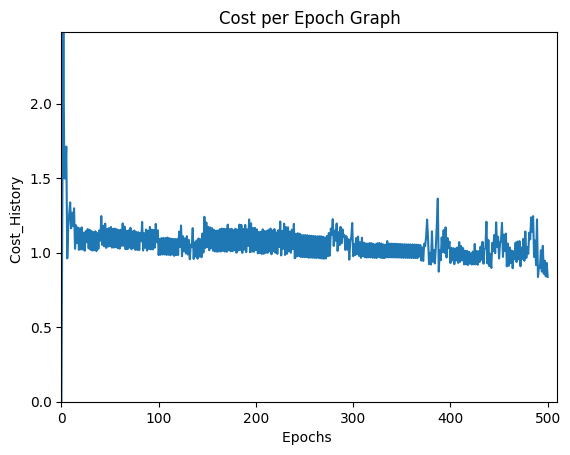

In [ ]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs ')
plt.ylabel('Cost_History ')
plt.title("Cost per Epoch Graph")
plt.xlim(0, training_epochs + 10)
plt.ylim(0, np.max(cost_history))
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

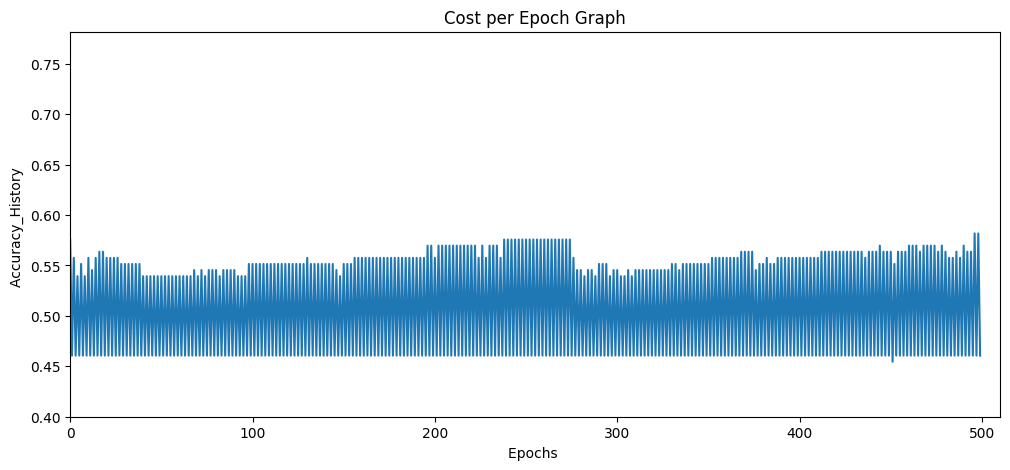

In [ ]:
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy_History ')
plt.title("Cost per Epoch Graph")
plt.xlim(0, training_epochs + 10)
plt.ylim(0.4, np.max(accuracy_history)+0.2)
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

In [ ]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.47619048


In [ ]:
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 1.2312
